# Load Data and Process data

In [3]:
import pandas as pd

# Load dataset
df = pd.read_csv('voice.csv')

# Encode labels: male: 0, female: 1
df['label'] = df['label'].map({'male': 0, 'female': 1})

# Separate features and target
X = df.drop('label', axis=1)
y = df['label']

print(df.head())

   meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.275862  0.007812  0.007812  

# Standarize

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split Data 80, 20

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# KNN Classification Model

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9747634069400631
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       317
           1       0.97      0.97      0.97       317

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634



# Feature Selection

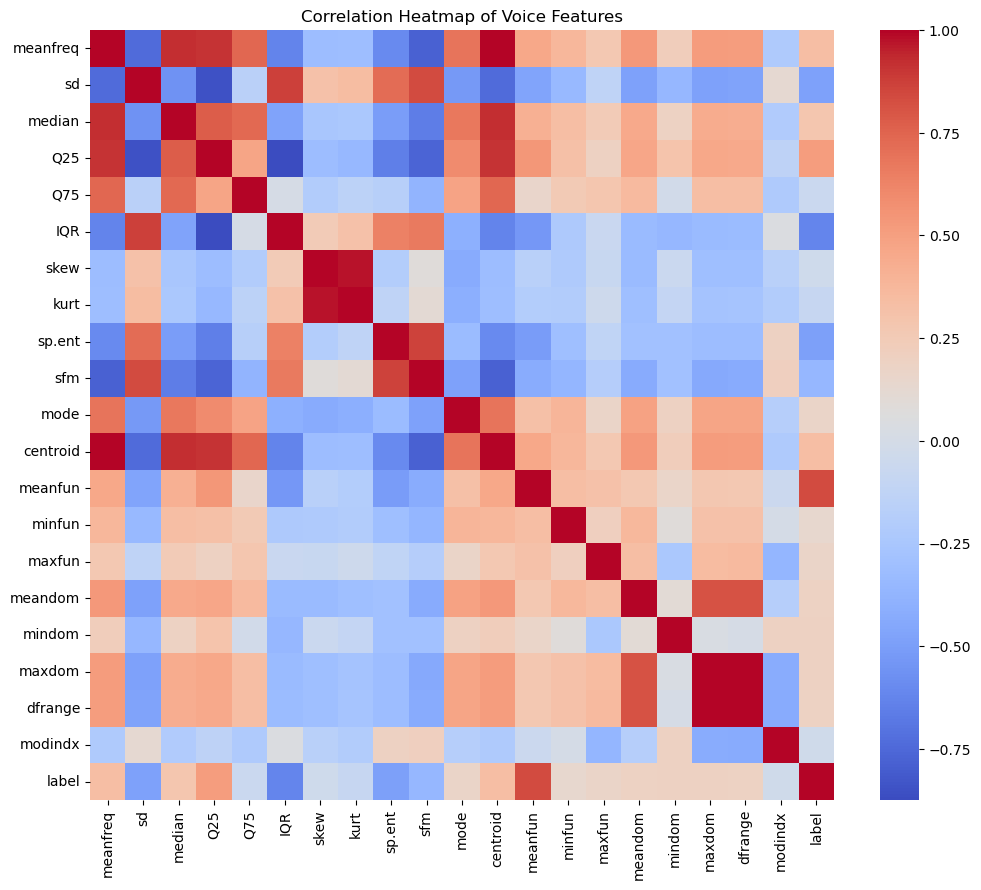

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap of Voice Features")
plt.show()

In [12]:
selected_features = ['meanfun', 'minfun', 'IQR', 'sp.ent','sd']
X_sel = df[selected_features]
X_sel_scaled = scaler.fit_transform(X_sel)

X_train, X_test, y_train, y_test = train_test_split(
    X_sel_scaled, y, test_size=0.2, random_state=42, stratify=y)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"Accuracy (selected features): {acc:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy (selected features): 0.98

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       317
           1       0.97      0.99      0.98       317

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



# Optimal K values

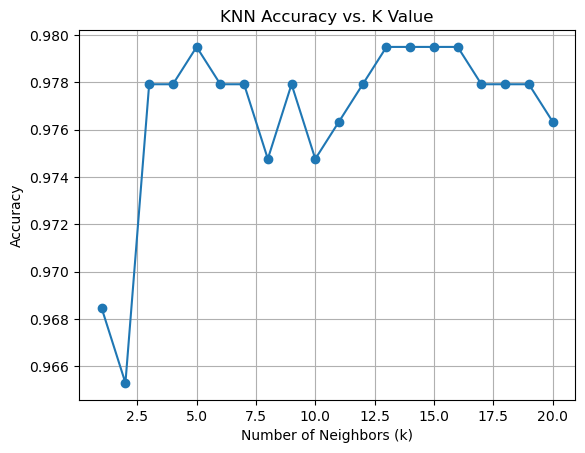

In [13]:
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    acc = knn.score(X_test, y_test)
    accuracies.append(acc)

plt.plot(k_values, accuracies, marker='o')
plt.title('KNN Accuracy vs. K Value')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


From the plot, the model’s accuracy peaks around k = 5, reaching approximately 0.98 (98%).

## Final Model with Optimal K

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

best_k = 5 

knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train, y_train)

y_pred_final = knn_final.predict(X_test)

print("\n=== Final Model Results ===")
print(f"Best k: {best_k}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_final):.3f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_final))
print("\nClassification Report:\n", classification_report(y_test, y_pred_final))


=== Final Model Results ===
Best k: 5
Accuracy: 0.979

Confusion Matrix:
 [[307  10]
 [  3 314]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       317
           1       0.97      0.99      0.98       317

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



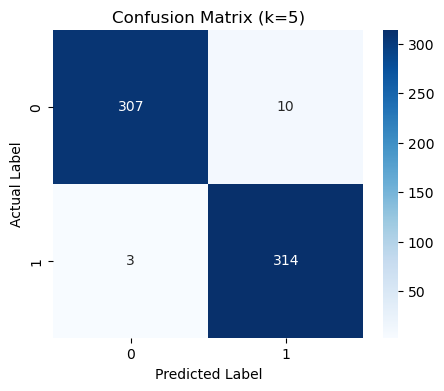

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_final)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title(f"Confusion Matrix (k={best_k})")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()


The K-Nearest Neighbors (KNN) model using the selected features which are meanfun, minfun, IQR, sp.ent, and sd, achieved an excellent overall performance with 98% accuracy.
The classification report shows balanced precision (0.98), recall (0.98), and F1-score (0.98) for both male and female voice classes, indicating that the model performs consistently across categories.
The confusion matrix further confirms this, with 307 correctly classified male samples, 314 correctly classified female samples, and only 13 total misclassifications.
These results demonstrate that the chosen features effectively capture the distinguishing acoustic characteristics between male and female voices, and that k = 5 provides the optimal trade-off between model complexity and accuracy.